# Statistics for Data Science - Week 7 Project

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Median Value of Owner-Occupied Homes

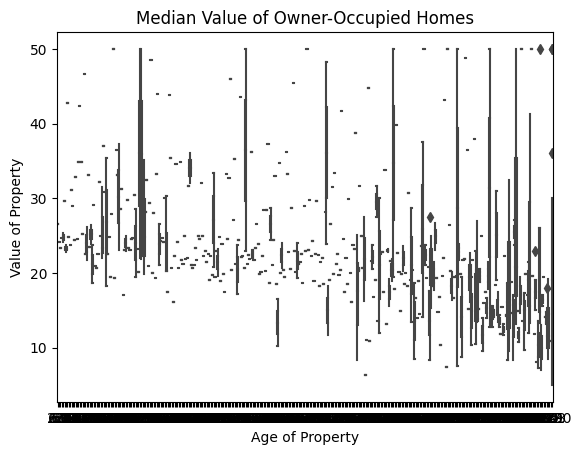

In [7]:
#created a boxplot using seaborn and matplotlib
ax = sns.boxplot(x='AGE', y='MEDV', data=boston_df).set(title='Median Value of Owner-Occupied Homes')
plt.xlabel('Age of Property')
plt.ylabel("Value of Property")
plt.show()

### The Charles River Variable

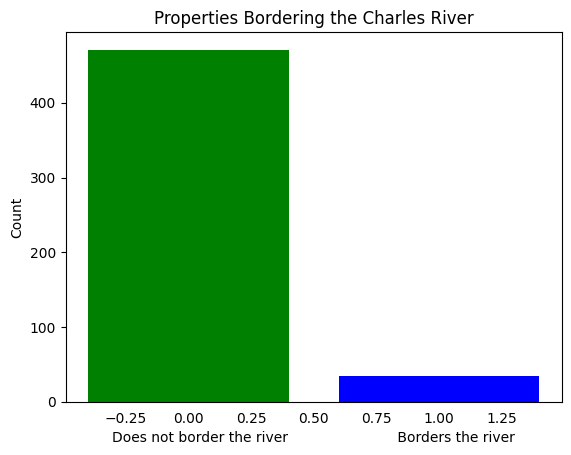

In [8]:
#created a bar plot for one variable using matplotlib
plt.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['green','blue'])
plt.xlabel('Does not border the river                         Borders the river')
plt.ylabel('Count')
plt.title('Properties Bordering the Charles River')
plt.tick_params(bottom=False)
plt.show()

### MEDV Variable vs AGE Variable

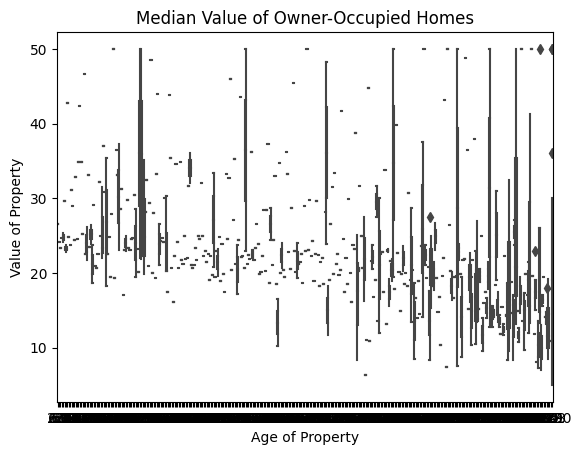

In [9]:
#created a boxplot using seaborn and matplotlib
ax = sns.boxplot(x='AGE', y='MEDV', data=boston_df).set(title='Median Value of Owner-Occupied Homes')
plt.xlabel('Age of Property')
plt.ylabel("Value of Property")
plt.show()

### Scatter Plot of NOX vs INDUS

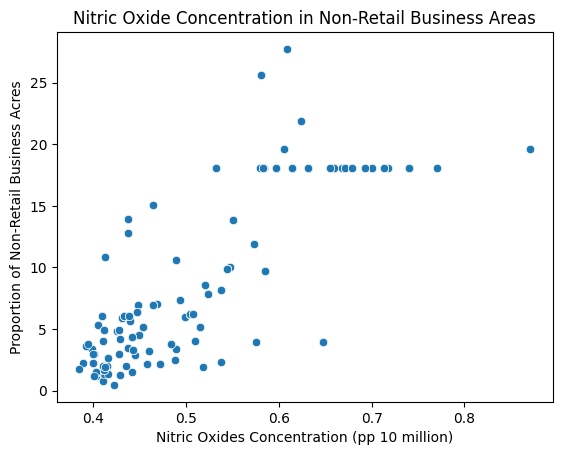

In [10]:
#created a scatterplot using seaborn library
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.xlabel('Nitric Oxides Concentration (pp 10 million)')
plt.ylabel("Proportion of Non-Retail Business Acres")
plt.title('Nitric Oxide Concentration in Non-Retail Business Areas')
plt.show()

Conclusion: it's clear that the greater the number of non-retail businesses, the greater the concentration of nitric oxides.

### Histogram for the Pupil to Teacher Ratio

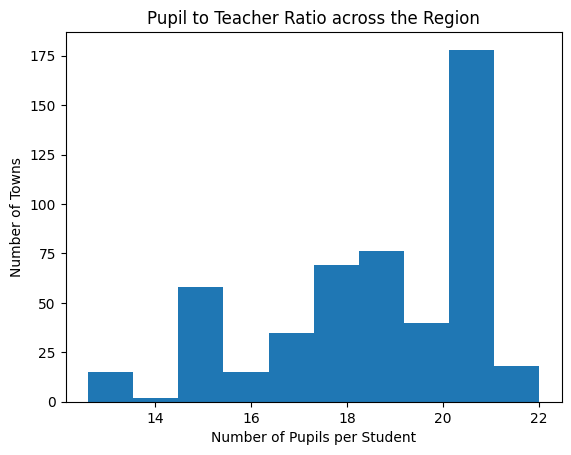

In [11]:
plt.hist(boston_df['PTRATIO'])
plt.xlabel('Number of Pupils per Student')
plt.ylabel("Number of Towns")
plt.title('Pupil to Teacher Ratio across the Region')
plt.show()

# Statistical Analysis Questions

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

The p-value is less than alpha so we accept our null hypothesis; there is no significant difference between median value of houses bounded by the Charles river and those that aren't.

In [12]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0.0]['MEDV'],boston_df[boston_df['CHAS']==1.0]['MEDV'],equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

There is no significant difference in the median values of homes built prior to 1940, as evidenced by the p-value being less than alpha.

In [19]:
boston_df.loc[(boston_df['AGE']<=35),'agegroup']='35 years and younger'
boston_df.loc[(boston_df['AGE']>=35)&(boston_df['AGE']<70),'agegroup']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'agegroup']='70 years and older'

thirty_five_years_younger=boston_df[boston_df['agegroup']=='35 years and younger']['MEDV']
seventy_years_older=boston_df[boston_df['agegroup']=='70 years and older']['MEDV']
thirty_five_seventy=boston_df[boston_df['agegroup']=='between 35 and 70 years']['MEDV']

f_stats,p_value=scipy.stats.f_oneway(thirty_five_years_younger,thirty_five_seventy,seventy_years_older)
print(f_stats)
print(p_value)

36.40764999196599
1.7105011022702984e-15


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

We must conclude that there is a strong relationship between nitric oxide concentration and proportion of non-retail business acres because the Pearson Correlation value is 0.76.

In [14]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061233745e-98)

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)